<a href="https://colab.research.google.com/github/AinhoaCG/airbnb-nyc-analysis/blob/main/Airbnb_NYC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISIS AIRBNB NYC**

Ainhoa Cifuentes González

---
Este proyecto tiene como objetivo realizar un análisis exploratorio de los datos de AirBnB en Nueva York y generar recomendaciones de precios para nuevas propiedades proporcionadas por una agencia. Para ello, utilizaremos datos históricos y aplicaremos técnicas de ciencia de datos, desde el análisis exploratorio hasta la predicción con modelos de machine learning.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datos_agencia.csv to datos_agencia.csv
Saving datos_new_york.csv to datos_new_york.csv


In [ ]:
import pandas as pd
import io

df_agencia = pd.read_csv(io.BytesIO(uploaded['datos_agencia.csv']))
df_ny = pd.read_csv(io.BytesIO(uploaded['datos_new_york.csv']))

# Revisión de datos

In [ ]:
df_ny.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48882 entries, 0 to 48881
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      48882 non-null  int64  
 1   id                              48882 non-null  int64  
 2   name                            48866 non-null  object 
 3   host_id                         48882 non-null  int64  
 4   host_name                       48861 non-null  object 
 5   neighbourhood_group             48882 non-null  object 
 6   neighbourhood                   48882 non-null  object 
 7   latitude                        48882 non-null  float64
 8   longitude                       48882 non-null  float64
 9   room_type                       48882 non-null  object 
 10  price                           48882 non-null  int64  
 11  minimum_nights                  48882 non-null  int64  
 12  number_of_reviews               

In [ ]:
df_ny.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48882.000000,4.888200e+04,4.888200e+04,48882.000000,48882.000000,48882.000000,48882.000000,48882.000000,38830.000000,48882.000000,48882.000000
mean,24447.991490,1.901781e+07,6.762096e+07,40.728943,-73.952164,152.676854,7.031300,23.276809,1.373511,7.142425,112.732519
std,14116.590061,1.098443e+07,7.862140e+07,0.054536,0.046162,240.155111,20.513113,44.555916,1.680636,32.956762,131.604795
min,0.000000,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,12220.250000,9.470534e+06,7.814127e+06,40.690090,-73.983080,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,24450.500000,1.967936e+07,3.077894e+07,40.723050,-73.955670,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,36673.750000,2.915310e+07,1.074344e+08,40.763127,-73.936270,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,48894.000000,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df_ny.isnull().sum()

,0
Unnamed: 0,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0


In [ ]:
df_agencia.head()

,Unnamed: 0,neighbourhood_group,neighbourhood,latitude,longitude,room_type
0,18401,Manhattan,Midtown,40.75380,-73.97139,Entire home/apt
1,18582,Manhattan,Midtown,40.75294,-73.97330,Entire home/apt
2,18905,Manhattan,Midtown,40.75233,-73.97137,Private room
3,19110,Manhattan,Midtown,40.75326,-73.97303,Entire home/apt
4,19111,Manhattan,Midtown,40.75368,-73.97358,Private room


In [ ]:
df_agencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           13 non-null     int64  
 1   neighbourhood_group  13 non-null     object 
 2   neighbourhood        13 non-null     object 
 3   latitude             13 non-null     float64
 4   longitude            13 non-null     float64
 5   room_type            13 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 756.0+ bytes


In [ ]:
df_agencia.describe()

,Unnamed: 0,latitude,longitude
count,13.000000,13.000000,13.000000
mean,20718.846154,40.752752,-73.972710
std,2854.323733,0.000679,0.000796
min,18401.000000,40.751720,-73.973640
25%,19110.000000,40.752300,-73.973300
50%,19216.000000,40.752940,-73.972880
75%,20027.000000,40.753240,-73.972130
max,25740.000000,40.753800,-73.971370


In [ ]:
df_agencia.isnull().sum()

,0
Unnamed: 0,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0


# Limpieza de datos

In [ ]:
df_ny.drop(columns=['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'last_review'], inplace=True)

In [ ]:
df_ny['reviews_per_month'] = df_ny['reviews_per_month'].fillna(0)

In [ ]:
df_ny.isnull().sum()

,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0
reviews_per_month,0
calculated_host_listings_count,0


In [ ]:
df_ny['price'].describe()

,price
count,48882.000000
mean,152.676854
std,240.155111
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


In [ ]:
df_ny = df_ny[(df_ny['price'] > 0) & (df_ny['price'] <= 500)]

In [ ]:
df_ny['minimum_nights'].describe()

,minimum_nights
count,47829.000000
mean,6.982605
std,20.390265
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,1250.000000


In [ ]:
df_ny = df_ny[df_ny['minimum_nights'] <= 30]

# Análisis exploratorio (EDA)

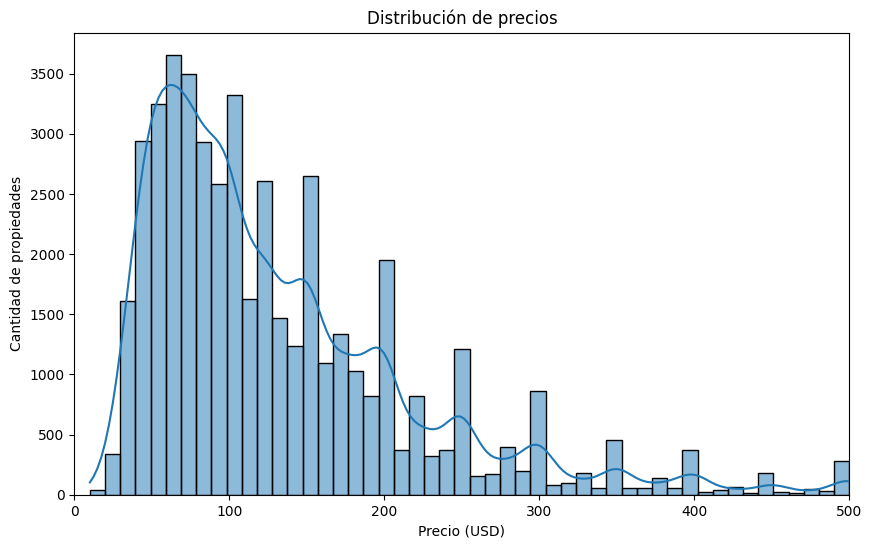

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(df_ny['price'], bins=50, kde=True)
plt.title('Distribución de precios')
plt.xlabel('Precio (USD)')
plt.ylabel('Cantidad de propiedades')
plt.xlim(0, 500)
plt.show()

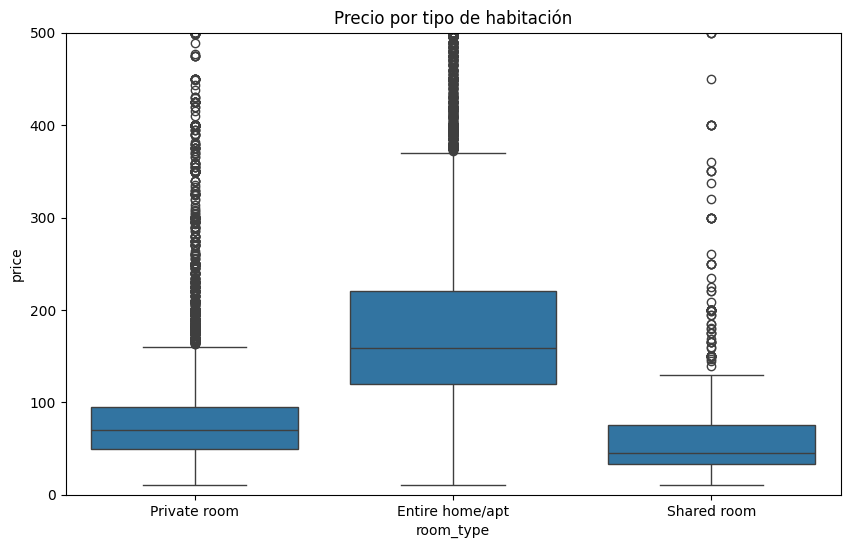

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data=df_ny)
plt.title('Precio por tipo de habitación')
plt.ylim(0, 500)
plt.show()

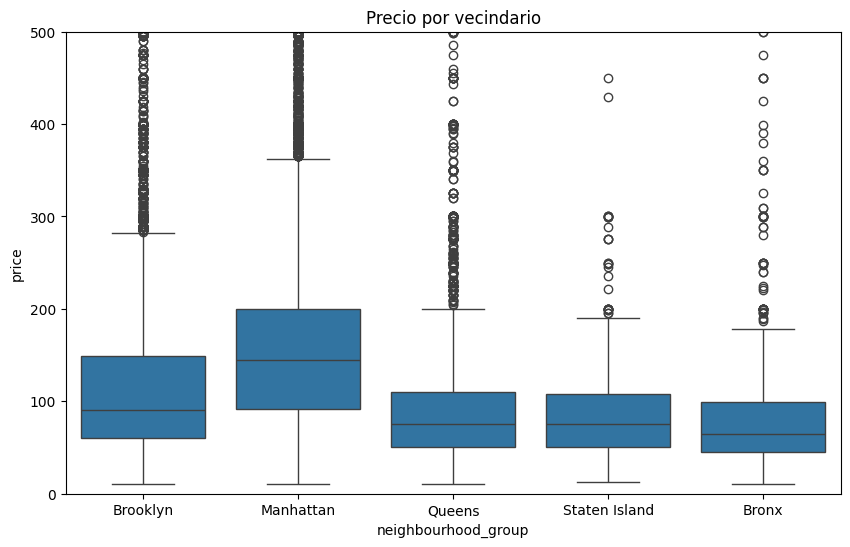

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='neighbourhood_group', y='price', data=df_ny)
plt.title('Precio por vecindario')
plt.ylim(0, 500)
plt.show()

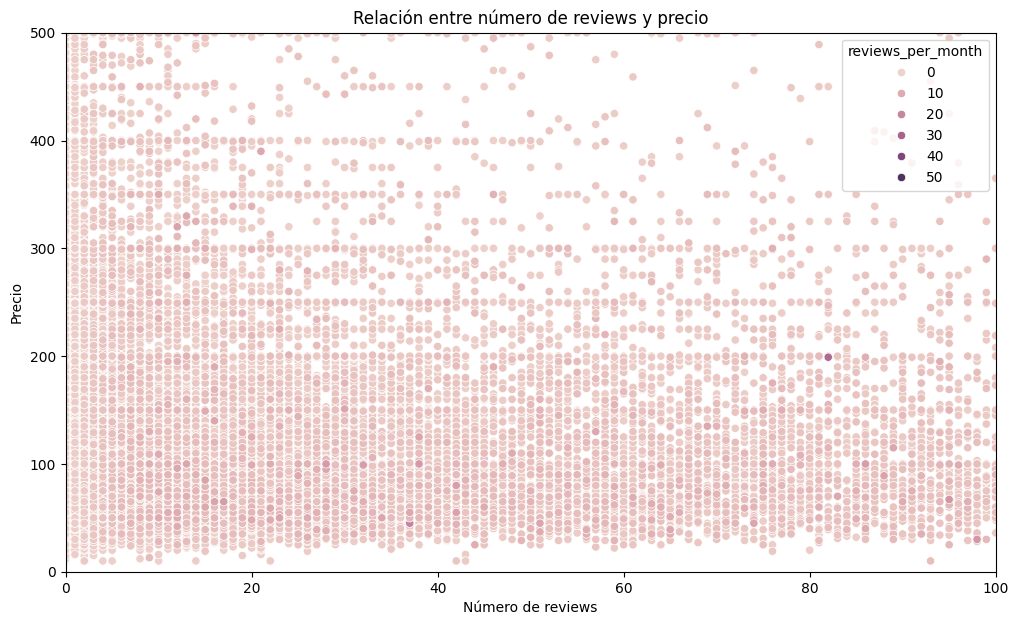

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='number_of_reviews', y='price', data=df_ny, alpha=1, hue = 'reviews_per_month')
plt.title('Relación entre número de reviews y precio')
plt.xlabel('Número de reviews')
plt.ylabel('Precio')
plt.xlim(0, 100)
plt.ylim(0, 500)
plt.show()

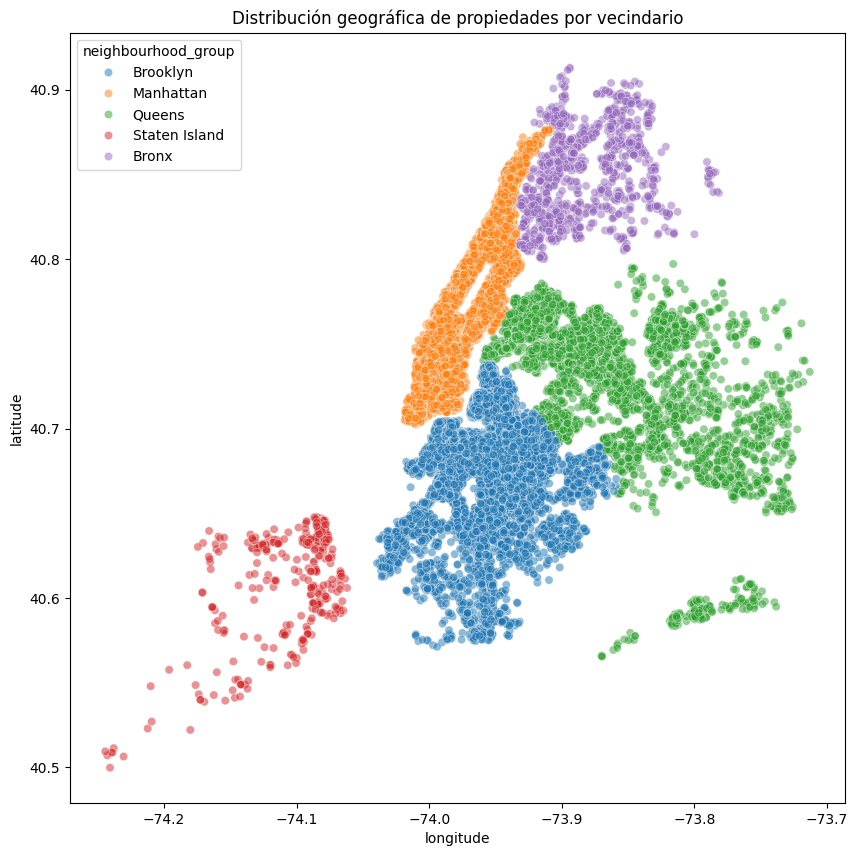

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df_ny, alpha=0.5)
plt.title('Distribución geográfica de propiedades por vecindario')
plt.show()

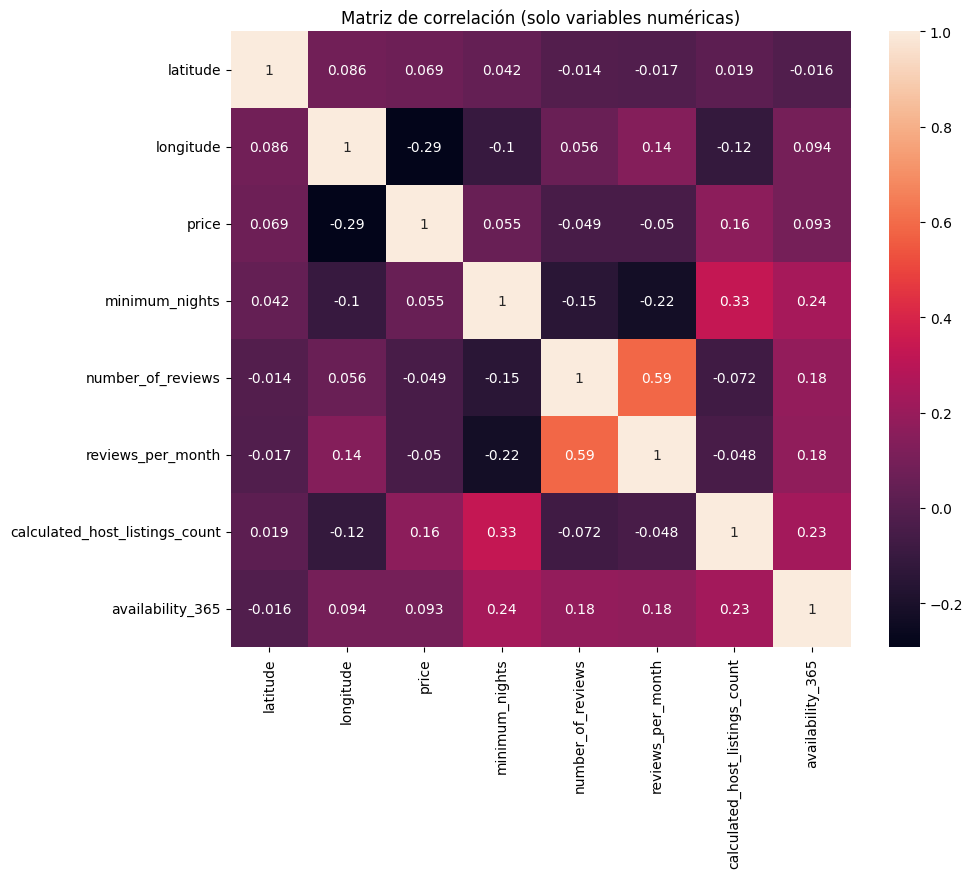

In [ ]:
numeric_cols = df_ny.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True)
plt.title('Matriz de correlación (solo variables numéricas)')
plt.show()

# Preparación del modelo

In [ ]:
df_ny.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
df_model = pd.get_dummies(df_ny, columns=['neighbourhood_group', 'neighbourhood', 'room_type'], drop_first=True)

In [ ]:
df_model.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,True,False,...,False,False,False,False,False,False,False,False,True,False
1,40.75362,-73.98377,225,1,45,0.38,2,355,False,True,...,False,False,False,False,False,False,False,False,False,False
2,40.80902,-73.94190,150,3,0,0.00,1,365,False,True,...,False,False,False,False,False,False,False,False,True,False
3,40.68514,-73.95976,89,1,270,4.64,1,194,True,False,...,False,False,False,False,False,False,False,False,False,False
4,40.79851,-73.94399,80,10,9,0.10,1,0,False,True,...,False,False,False,False,False,False,False,False,False,False


# Entrenamiento

In [ ]:
X = df_model.drop('price', axis=1)
y = np.log1p(df_model['price'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print (lm.intercept_)

-290.8495747861634


In [ ]:
lm.coef_

array([-2.05253907e-01, -4.11317218e+00, -1.17251162e-02, -4.91246963e-04,
       -1.02935401e-02,  4.07452318e-04,  7.67896201e-04, -1.42606754e-01,
        1.79992413e-01,  3.63535593e-01, -1.02973450e+00, -5.31398582e-01,
        9.44210455e-02,  2.44893034e-01, -3.32589128e-01, -4.38826549e-01,
       -9.00236580e-02, -3.76548232e-01,  5.71113564e-01, -3.01787206e-02,
        2.29266873e-01,  1.93827130e-01,  2.13033773e-01,  5.03853900e-02,
        3.39992404e-01,  4.13929943e-01,  4.32153444e-02, -3.50707394e-01,
        8.43696720e-02,  1.89605486e-01, -4.69687342e-01,  9.61977605e-01,
       -2.95879033e-02, -1.15294750e-01, -2.33329829e-01,  1.70776033e-01,
       -5.86304016e-02, -1.86183044e-01,  8.34433097e-02,  3.91337476e-01,
        7.54594261e-02,  8.33284311e-02, -1.53798838e-01,  3.48993627e-01,
        9.52251259e-02, -1.04175019e-01,  4.48934784e-01, -1.12878742e-01,
       -5.57209046e-02,  1.82320993e-01,  3.17507145e-01,  1.71433664e-01,
        4.39502500e-01,  

# Predicciones y evaluación

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
pred_log = lm.predict(X_test)
pred = np.expm1(pred_log)
y_test_real = np.expm1(y_test)

In [ ]:
df_resultado = pd.DataFrame({'Precio_real': y_test_real, 'Precio_predicho': pred})

In [ ]:
df_resultado['Error_absoluto'] = abs(df_resultado['Precio_real'] - df_resultado['Precio_predicho'])

In [ ]:
df_resultado.head()

,Precio_real,Precio_predicho,Error_absoluto
6952,95.0,74.492499,20.507501
27197,35.0,56.226143,21.226143
18249,99.0,171.971647,72.971647
27348,40.0,81.067928,41.067928
38238,285.0,273.153456,11.846544


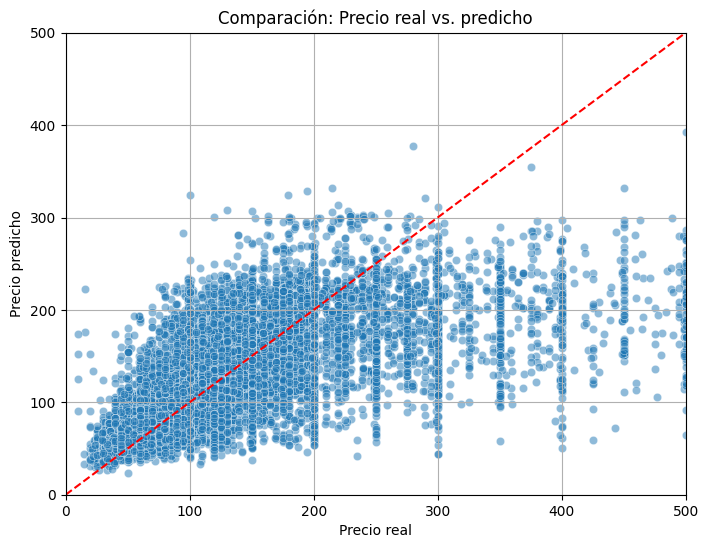

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Precio_real', y='Precio_predicho', data=df_resultado, alpha=0.5)
plt.plot([0, 500], [0, 500], 'r--')  # Línea perfecta
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Comparación: Precio real vs. predicho')
plt.grid(True)
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.show()

# Métricas

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
mae = mean_absolute_error(y_test_real, pred)
rmse = np.sqrt(mean_squared_error(y_test_real, pred))
r2 = r2_score(y_test_real, pred)

In [ ]:
print(f'MAE: ${mae:.2f}')
print(f'RMSE: ${rmse:.2f}')
print(f'R²: {r2:.3f}')

MAE: $40.41
RMSE: $63.77
R²: 0.457


# Predicciones con los datos de la agencia

In [ ]:
df_agencia['reviews_per_month'] = df_agencia.get('reviews_per_month', 0)

In [ ]:
df_agencia['number_of_reviews'] = 0

In [ ]:
df_agencia['minimum_nights'] = 1

In [ ]:
df_agencia_dummies = pd.get_dummies(df_agencia, columns=['neighbourhood_group', 'neighbourhood', 'room_type'], drop_first=True)

In [ ]:
for col in X.columns:
    if col not in df_agencia_dummies.columns:
        df_agencia_dummies[col] = 0

<ipython-input-51-2992440969>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_agencia_dummies[col] = 0
<ipython-input-51-2992440969>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_agencia_dummies[col] = 0
<ipython-input-51-2992440969>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_agenc

In [ ]:
df_agencia_dummies = df_agencia_dummies[X.columns]

In [ ]:
preds_agencia_log = lm.predict(df_agencia_dummies)
preds_agencia = np.expm1(preds_agencia_log)

In [ ]:
df_agencia['Precio_sugerido'] = preds_agencia.round(2)

In [ ]:
print("\n=== PREDICCIONES PARA LA AGENCIA ===")
print(df_agencia[['neighbourhood_group', 'neighbourhood', 'room_type', 'Precio_sugerido']])


=== PREDICCIONES PARA LA AGENCIA ===
   neighbourhood_group neighbourhood        room_type  Precio_sugerido
0            Manhattan       Midtown  Entire home/apt           152.07
1            Manhattan       Midtown  Entire home/apt           153.30
2            Manhattan       Midtown     Private room            75.61
3            Manhattan       Midtown  Entire home/apt           153.12
4            Manhattan       Midtown     Private room            76.29
5            Manhattan       Midtown  Entire home/apt           152.58
6            Manhattan       Midtown     Private room            76.18
7            Manhattan       Midtown     Private room            76.09
8            Manhattan       Midtown  Entire home/apt           153.04
9            Manhattan       Midtown  Entire home/apt           153.48
10           Manhattan       Midtown  Entire home/apt           152.60
11           Manhattan       Midtown     Private room            75.85
12           Manhattan       Midtown   

In [ ]:
y_pred_log = lm.predict(X_test)
y_test_orig = np.expm1(y_test)

In [ ]:
y_pred = np.expm1(y_pred_log)
y_test_orig = np.expm1(y_test)

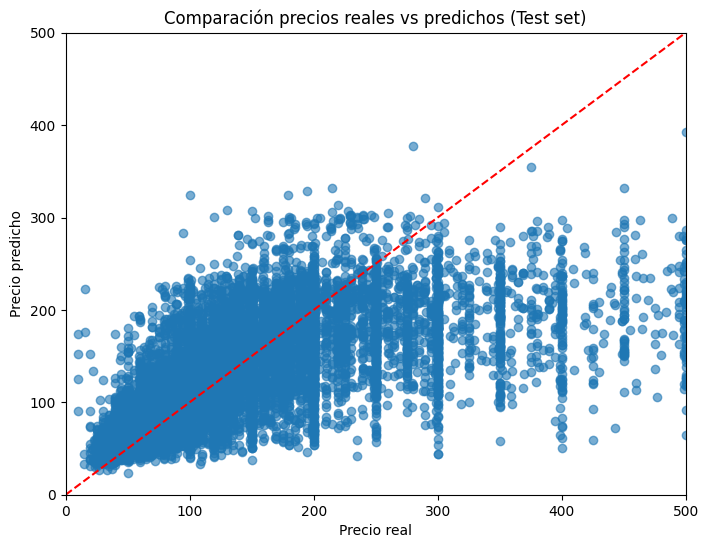

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_orig, y_pred, alpha=0.6)
plt.plot([0, 500], [0, 500], color='red', linestyle='--')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Comparación precios reales vs predichos (Test set)')
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.show()